### Car price Prediction Model Using a RandomForestRegressor Model, and Train the Model using the Car Selling datapoints.

In [3]:
## Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit , RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

In [4]:
## Load CSV file

cars = pd.read_csv('Car data Price.csv')

cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


####   Perform EDA  & data Pre-processing on the data

In [5]:
cars.shape

(8128, 13)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 539.8+ KB


In [7]:
## Check for NULL values 

cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
## Drop all NULL values


cars = cars.dropna(how='any')

cars.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [9]:
cars.shape

(7906, 13)

In [10]:
## Edit Torque Column Dtype by removing the strings

## Using Regular (re) Expressions

torque = cars['torque'].to_list()

torque_new = []

def extract(x):
  for item in x:
    res = item.replace(".", "")
    res = res.replace(",", "")
    temp = [int(s) for s in re.findall(r'\d+', res)]
    torque_new.append(max(temp))

extract(torque)
print(torque[:2])

print(torque_new[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [59]:
cars['torque_new'] = torque_new

cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500


In [60]:
## Edit Mileage Column Dtype by removing the strings


miles = cars['mileage'].to_list()

mileage_new = []
def extractmileage(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    mileage_new.append(max(temp))

extractmileage(miles)
print(miles[:2])

print(mileage_new[:2])


['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [61]:
cars['mileage_new'] = mileage_new

cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_new,mileage_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14


In [62]:
## Edit Engine Column Dtype by removing the strings


engine = cars['engine'].to_list()

engine_new = []
def extractEngine(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    engine_new.append(max(temp))

extractEngine(engine)
print(engine[:2])

print(engine_new[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [63]:
cars['engine_new'] = engine_new

cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_new,mileage_new,engine_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0


In [64]:
## Edit Max_Power Column Dtype by removing the strings


power = cars['max_power'].to_list()

max_power_new = []
def extractpower(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    max_power_new.append(max(temp))

extractpower(power)
print(power[:2])

print(max_power_new[:2])


['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [65]:
cars['max_power_new'] = max_power_new

cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_new,mileage_new,engine_new,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52


In [67]:
### Drop Columns = Mileage, Max_power, Engine, Torque.


cars_df = cars.drop(['mileage', 'engine', 'torque', 'max_power'], axis = 1)

cars_df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_new,mileage_new,engine_new,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20


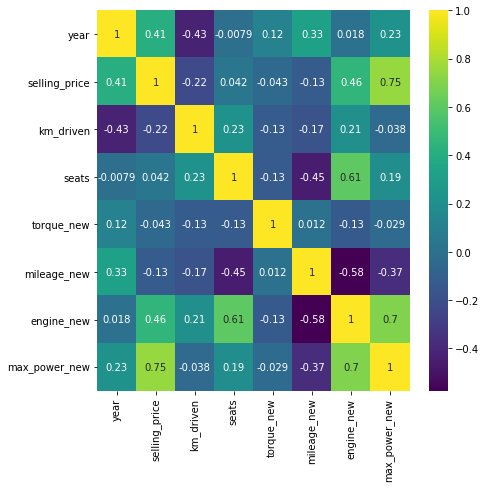

In [68]:

## Visualize Correlation using heatmap. Numerical Column

plt.figure(figsize=(7,7))
sns.heatmap(cars_df.corr(),annot=True,cmap='viridis')
plt.show()


### High correlation between Selling_Power and Max_Power_new

In [69]:
### Convert Fuel column Dtype to integer.

cars_df['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [70]:
def ref(y):
  if y == 'Diesel':
    return 1
  elif y == 'Petrol':
    return -1
  else:
    return 0

cars_df['fuel'] = cars_df['fuel'].map(ref)

In [71]:

### Convert Seller_Type column Dtype to integer.

cars_df['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [72]:
def ref1(y):
  if y == 'Individual':
    return 1
  elif y == 'Dealer':
    return 0
  else:
    return -1

cars_df['seller_type'] = cars_df['seller_type'].map(ref1)

In [73]:

### Convert Transmission column Dtype from object to integer format.

cars_df['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [74]:
def ref2(y):
  if y == 'Manual':
    return 1
  else:
    return -1

cars_df['transmission'] = cars_df['transmission'].map(ref2)

In [75]:

### Convert Owner column Dtype to integer.

cars_df['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [76]:
###  Apply OneHot Encoding

owners = pd.get_dummies(cars_df['owner'])

X = pd.concat([cars_df, owners], axis=1)

In [77]:
X.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_new,mileage_new,engine_new,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,First Owner,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,Second Owner,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,-1,1,1,Third Owner,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,First Owner,5.0,2750,23.00,1396.0,90.00,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,-1,1,1,First Owner,5.0,4500,16.10,1298.0,88.20,1,0,0,0,0


In [78]:
### Split Data into Dependent & Independent

Y = X['selling_price']

X = X.drop(['selling_price', 'name', 'owner'], axis = 1)


In [125]:


Xtrain, Xtest, Ytrain, Ytest = train_test_split(X[:3000], Y[:3000], test_size=0.2)

## Only 3000 data points are used instead of 7906 because it will take longer training time and space.

In [126]:
### Using RandomForestRegressor

random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [127]:
### Predict Data

random_model.fit(Xtrain, Ytrain)

pred = random_model.predict(Xtest)

print(pred)


[ 270289.94333333  480333.33333333  981203.32666667 5150000.
  379719.99333333  232719.96        251366.10777778  832529.57666667
  371836.40111111  259037.49083333 2000000.          417858.03555556
  787629.16666667  612763.04555556  710507.49        254366.53666667
  251096.65666667  682963.27333333  216726.60777778  152006.66888889
  415776.64333333  553325.55555556  329361.09444444  405370.80444444
  623359.70333333  427723.55111111  541999.86        430879.50888889
 1064346.66666667  784731.66666667  521789.98333333  338941.66666667
  895700.          603603.32333333  545516.66666667  165209.98666667
  121621.68        200244.16333333  366496.33333333 1138132.21888889
  525726.52        221959.98666667  236872.16666667  148126.66
  165625.26666667  307093.27333333  610336.62333333  625650.
  355491.08444444  279410.          436604.68555556  386153.27
  566383.32333333  308302.73827778  623484.72222222  834266.53333333
  146356.61        563669.44444444  588904.16666667  291454.42

In [128]:
### Check the accuracy for Train

random_model_accuracy = round(random_model.score(Xtrain, Ytrain)*100,2)

print(round(random_model_accuracy, 2), '%')

99.01 %


In [129]:
### Check the accuracy for Test

random_model_accuracy1 = round(random_model.score(Xtest, Ytest)*100,2)

print(round(random_model_accuracy1, 2), '%')

96.25 %


In [130]:

### Check R Squared Value


r2_score(pred, Ytest)

0.960692977139267

In [132]:
### Display Actual and Predicted Data

pd.DataFrame(np.c_[Ytest , pred], columns = ['Actual' , 'Predicted'])

,Actual,Predicted
0,150000.0,2.702899e+05
1,650000.0,4.803333e+05
2,950000.0,9.812033e+05
3,5150000.0,5.150000e+06
4,300000.0,3.797200e+05
...,...,...
595,200000.0,2.665800e+05
596,500000.0,5.163277e+05
597,535000.0,4.415733e+05
598,465000.0,4.355367e+05


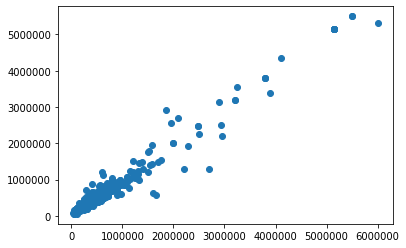

In [133]:
### Visualize Actual & Predicted Data


plt.scatter(Ytest, pred)

plt.show()

In [134]:
### Using Linear Regression Model

reg = LinearRegression()

reg.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
### Training

print(round(reg.score(Xtrain, Ytrain), 2))

0.69


In [136]:
### Testing

print(round(reg.score(Xtest, Ytest), 2))

0.7


### RandomForestRegressor gives a higher accuracy than Linear Regression

In [137]:
# Save the RandomForestRegressor model as a pickle string.

import pickle 

saved_model = pickle.dump(random_model, open('CarSelling.pickle','wb'))